# BUAN 6340 Group Project
### How Personalities And Drug Consumption Are Related

In [338]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [339]:
df = pd.read_csv('drug_consumption.csv')
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


#### Age gender education country ethnicity these categorical columns in real world are transformed into numeric by case fraction  

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
ID           1885 non-null int64
Age          1885 non-null float64
Gender       1885 non-null float64
Education    1885 non-null float64
Country      1885 non-null float64
Ethnicity    1885 non-null float64
Nscore       1885 non-null float64
Escore       1885 non-null float64
Oscore       1885 non-null float64
Ascore       1885 non-null float64
Cscore       1885 non-null float64
Impulsive    1885 non-null float64
SS           1885 non-null float64
Alcohol      1885 non-null object
Amphet       1885 non-null object
Amyl         1885 non-null object
Benzos       1885 non-null object
Caff         1885 non-null object
Cannabis     1885 non-null object
Choc         1885 non-null object
Coke         1885 non-null object
Crack        1885 non-null object
Ecstasy      1885 non-null object
Heroin       1885 non-null object
Ketamine     1885 non-null object
Legalh       1885 non-null objec

In [341]:
print("Number of Unique Countries: ", len(df.Country.unique()))
print("Number of Unique Ethnicity: ", len(df.Ethnicity.unique()))
print("Number of Unique Age: ", len(df.Age.unique()))
print("Number of Unique Education: ", len(df.Education.unique()))

Number of Unique Countries:  7
Number of Unique Ethnicity:  7
Number of Unique Age:  6
Number of Unique Education:  9


# Data Processing

In [342]:
df['Gender'] = df['Gender'].astype(str)
df=df.apply(pd.Series.replace, to_replace='0.48246000000000006',value='Female')
df=df.apply(pd.Series.replace, to_replace='-0.48246000000000006',value='Male')
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,Female,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,Male,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,Male,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,Female,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,Female,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [343]:
df['Ethnicity'] = df['Ethnicity'].astype(str)
df=df.apply(pd.Series.replace, to_replace='0.126',value='White/Asian')
df=df.apply(pd.Series.replace, to_replace='-0.31685',value='White')
df=df.apply(pd.Series.replace, to_replace='0.1144',value='Other')
df=df.apply(pd.Series.replace, to_replace='-0.22166',value='White/Black')
df=df.apply(pd.Series.replace, to_replace='-0.50212',value='Asian')
df=df.apply(pd.Series.replace, to_replace='-1.1070200000000001',value='Black')
df=df.apply(pd.Series.replace, to_replace='1.90725',value='Black/Asian')
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,Female,-0.05921,0.96082,White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,Male,1.98437,0.96082,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,Male,-0.05921,0.96082,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,Female,1.16365,0.96082,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,Female,1.98437,0.96082,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [344]:
df['Age'] = df['Age'].astype(str)
df=df.apply(pd.Series.replace, to_replace='0.49788000000000004',value='35-44')
df=df.apply(pd.Series.replace, to_replace='-0.07854',value='25-34')
df=df.apply(pd.Series.replace, to_replace='-0.9519700000000001',value='18-24')
df=df.apply(pd.Series.replace, to_replace='2.59171',value='65+')
df=df.apply(pd.Series.replace, to_replace='1.09449',value='45-54')
df=df.apply(pd.Series.replace, to_replace='1.82213',value='55-64')
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,-0.05921,0.96082,White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,Male,1.98437,0.96082,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,Male,-0.05921,0.96082,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,Female,1.16365,0.96082,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,Female,1.98437,0.96082,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [345]:
df['Country'] = df['Country'].astype(str)
df=df.apply(pd.Series.replace, to_replace='0.9608200000000001',value='UK')
df=df.apply(pd.Series.replace, to_replace='-0.09765',value='Australia')
df=df.apply(pd.Series.replace, to_replace='0.24923',value='Canada')
df=df.apply(pd.Series.replace, to_replace='-0.46841000000000005',value='New Zealand')
df=df.apply(pd.Series.replace, to_replace='-0.28519',value='Other')
df=df.apply(pd.Series.replace, to_replace='0.21128000000000002',value='Republic of Ireland')
df=df.apply(pd.Series.replace, to_replace='-0.57009',value='USA')
df.head(20)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,-0.05921,UK,White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,Male,1.98437,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,Male,-0.05921,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,Female,1.16365,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,Female,1.98437,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,65+,Female,-1.22751,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,45-54,Male,1.16365,USA,White,-0.46725,-1.09207,-0.45174,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,35-44,Male,-1.73790,UK,White,-1.32828,1.93886,-0.84732,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,35-44,Female,-0.05921,Canada,White,0.62967,2.57309,-0.97631,0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,55-64,Male,1.16365,UK,White,-0.24649,0.00332,-1.42424,0.59042,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [346]:
df['Education'] = df['Education'].astype(str)
df=df.apply(pd.Series.replace, to_replace='-2.43591',value='before 16 years')
df=df.apply(pd.Series.replace, to_replace='-1.7379',value='at 16 years')
df=df.apply(pd.Series.replace, to_replace='-1.43719',value='at 17 years')
df=df.apply(pd.Series.replace, to_replace='-1.22751',value='at 18 years')
df=df.apply(pd.Series.replace, to_replace='-0.6111300000000001',value='Some College,No Certificate Or Degree')
df=df.apply(pd.Series.replace, to_replace='-0.059210000000000006',value='Professional Certificate/ Diploma')
df=df.apply(pd.Series.replace, to_replace='0.45468000000000003',value='University Degree')
df=df.apply(pd.Series.replace, to_replace='1.16365',value='Masters Degree')
df=df.apply(pd.Series.replace, to_replace='1.98437',value='Doctorate Degree')
df.head(10)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,Professional Certificate/ Diploma,UK,White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,Male,Doctorate Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,Male,Professional Certificate/ Diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,Female,Masters Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,Female,Doctorate Degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,65+,Female,at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,45-54,Male,Masters Degree,USA,White,-0.46725,-1.09207,-0.45174,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,35-44,Male,at 16 years,UK,White,-1.32828,1.93886,-0.84732,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,35-44,Female,Professional Certificate/ Diploma,Canada,White,0.62967,2.57309,-0.97631,0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,55-64,Male,Masters Degree,UK,White,-0.24649,0.00332,-1.42424,0.59042,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [347]:
### for the various target variable 
df=df.replace('CL0', 0)
df=df.replace('CL1', 1)
df=df.replace('CL2', 1)
df=df.replace('CL3', 1)
df=df.replace('CL4', 1)
df=df.replace('CL5', 1)
df=df.replace('CL6', 1)
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,Professional Certificate/ Diploma,UK,White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,1,0,0
1,2,25-34,Male,Doctorate Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,1,0,1,0,1,1,0,1,0,0
2,3,35-44,Male,Professional Certificate/ Diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,1,0,0,0
3,4,18-24,Female,Masters Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,1,0,0,0,0,1,0,0
4,5,35-44,Female,Doctorate Degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,1,0,0,1,0,0,1,1,0,0


#### Now, we've done for the first part of data processing and we get rid off the numeric mask for categorical in original dataset, including age, gender, education, country, ethnicity column

#### Next we are moving on the data processing to transform the categorical data into hot vector(no ordinal difference) and 0,1...(ordinal difference)

In [348]:
## age 
age = df['Age']
ageVal = df['Age'].unique()
ageValCount = len(ageVal)
age_dict = {}
for i in range(0,ageValCount):
    age_dict[ageVal[i]] = i
df['Age'] = df['Age'].map(age_dict).astype(int)

In [349]:
## Gender
g_to_no = {
    'Female':0,
    'Male':1
}
df['Gender'] = df['Gender'].map(g_to_no).astype(int)

In [350]:
### education 
df['Education'].unique()
e_to_no = {
   'before 16 years' : 0,
    'Professional Certificate/ Diploma': 1,
    'Some College,No Certificate Or Degree': 2,
    'at 16 years':3,
    'University Degree':4,
    'at 17 years':5,
    'at 18 years':6,
    'Masters Degree':7,
    'Doctorate Degree':8  
}
df['Education'] = df['Education'].map(e_to_no).astype(int)

array(['Professional Certificate/ Diploma', 'Doctorate Degree',
       'Masters Degree', 'at 18 years', 'at 16 years',
       'University Degree', 'Some College,No Certificate Or Degree',
       'before 16 years', 'at 17 years'], dtype=object)

In [351]:
### country get dummies
df['Country'].unique()

country_du = pd.get_dummies(df['Country'],prefix = 'Country')
df = pd.concat([df,country_du], axis = 1).drop('Country', axis = 1)

array(['UK', 'Canada', 'USA', 'Other', 'Australia', 'Republic of Ireland',
       'New Zealand'], dtype=object)

In [352]:
### Ethnicity
df['Ethnicity'].unique()

eth_du = pd.get_dummies(df['Ethnicity'],prefix = 'Ethnicity')
df = pd.concat([df,eth_du], axis = 1).drop('Ethnicity', axis = 1)

array(['White/Asian', 'White', 'Other', 'White/Black', 'Asian', 'Black',
       'Black/Asian'], dtype=object)

In [414]:
df.head()

,ID,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,...,Country_Republic of Ireland,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Black/Asian,Ethnicity_Other,Ethnicity_White,Ethnicity_White/Asian,Ethnicity_White/Black
0,1,0,0,1,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,...,0,1,0,0,0,0,0,0,1,0
1,2,1,1,8,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,...,0,1,0,0,0,0,0,1,0,0
2,3,0,1,1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,...,0,1,0,0,0,0,0,1,0,0
3,4,2,0,7,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,0,1,0,0,0,0,0,1,0,0
4,5,0,0,8,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,...,0,1,0,0,0,0,0,1,0,0


# Chose 3 drugs

In [415]:
Alcohol = []
for i in df['Alcohol']:
    if(i==0):
        Alcohol.append([1,0,0,0,0,0,0])
    elif(i==1):
        Alcohol.append([0,1,0,0,0,0,0])
    elif(i==2):
        Alcohol.append([0,0,1,0,0,0,0])
    elif(i==3):
        Alcohol.append([0,0,0,1,0,0,0])
    elif(i==4):
        Alcohol.append([0,0,0,0,1,0,0])
    elif(i==5):
        Alcohol.append([0,0,0,0,0,1,0])
    elif(i==6):
        Alcohol.append([0,0,0,0,0,0,1])
Al = np.array(Alcohol)

In [426]:
Benzos = []
for i in df['Benzos']:
    if(i==0):
        Benzos.append([1,0,0,0,0,0,0])
    elif(i==1):
        Benzos.append([0,1,0,0,0,0,0])
    elif(i==2):
        Benzos.append([0,0,1,0,0,0,0])
    elif(i==3):
        Benzos.append([0,0,0,1,0,0,0])
    elif(i==4):
        Benzos.append([0,0,0,0,1,0,0])
    elif(i==5):
        Benzos.append([0,0,0,0,0,1,0])
    elif(i==6):
        Benzos.append([0,0,0,0,0,0,1])
BZ = np.array(Benzos)

In [420]:
Coke = []
for i in df['Coke']:
    if(i==0):
        Coke.append([1,0,0,0,0,0,0])
    elif(i==1):
        Coke.append([0,1,0,0,0,0,0])
    elif(i==2):
        Coke.append([0,0,1,0,0,0,0])
    elif(i==3):
        Coke.append([0,0,0,1,0,0,0])
    elif(i==4):
        Coke.append([0,0,0,0,1,0,0])
    elif(i==5):
        Coke.append([0,0,0,0,0,1,0])
    elif(i==6):
        Coke.append([0,0,0,0,0,0,1])
Co = np.array(Coke)

# Split Data for the 3 drugs

In [427]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

feature_col_names = ['Age', 'Gender', 'Education', 'Country_Republic of Ireland', 'Country_UK','Country_USA','Country_Canada','Country_Other','Country_New Zealand','Country_Australia','Ethnicity_Asian','Ethnicity_Black','Ethnicity_Black/Asian','Ethnicity_Other','Ethnicity_White','Ethnicity_White/Asian','Ethnicity_White/Black','Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
predicted_class_names = ['Alcohol']

scal= MinMaxScaler()


X = df[feature_col_names].values

y = df[predicted_class_names].values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Al, test_size=0.30, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Co, test_size=0.30, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, BZ, test_size=0.30, random_state=42)

X_train1_New = scal.fit_transform(X_train1)
X_test1_New = scal.fit_transform(X_test1)
X_train2_New = scal.fit_transform(X_train2)
X_test2_New = scal.fit_transform(X_test2)
X_train3_New = scal.fit_transform(X_train3)
X_test3_New = scal.fit_transform(X_test3)



# Decision Tree

In [446]:
# for alcohol
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(max_depth=5,random_state=1)
tree2 = DecisionTreeClassifier(max_depth=5,random_state=1)
tree3 = DecisionTreeClassifier(max_depth=5,random_state=1)

tree1.fit(X_train1_New, y_train1)

print("Accuracy on training set for alcohol: {:.3f}".format(tree1.score(X_train1_New, y_train1)))
print("Accuracy on test set for alcohol: {:.3f}".format(tree1.score(X_test1_New, y_test1)))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

Accuracy on training set for alcohol: 0.991
Accuracy on test set for alcohol: 0.968


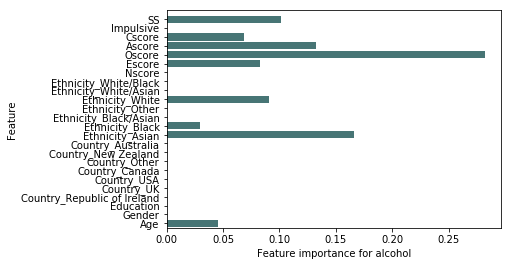

In [447]:
def plot_feature_importances_alcohol(model):
    n_features = X_train1.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, color=(0.2,0.4,0.4,0.9), align='center')
    #plt.barh(make a horizontal bar plot)
    plt.yticks(np.arange(n_features), feature_col_names)
    #plt.yticks(get the current trick location&label of the Y axis)
    plt.xlabel("Feature importance for alcohol")
    plt.ylabel("Feature")
    plt.ylim(-0.5, n_features)

plot_feature_importances_alcohol(tree1)

In [448]:
#for coke
tree2.fit(X_train2_New, y_train2)
print("Accuracy on training set for coke: {:.3f}".format(tree2.score(X_train2_New, y_train2)))
print("Accuracy on test set for coke: {:.3f}".format(tree2.score(X_test2_New, y_test2)))


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

Accuracy on training set for coke: 0.726
Accuracy on test set for coke: 0.640


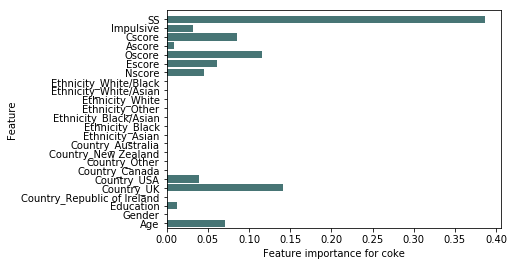

In [449]:
def plot_feature_importances_coke(model):
    n_features = X_train2.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, color=(0.2,0.4,0.4,0.9), align='center')
    #plt.barh(make a horizontal bar plot)
    plt.yticks(np.arange(n_features), feature_col_names)
    #plt.yticks(get the current trick location&label of the Y axis)
    plt.xlabel("Feature importance for coke")
    plt.ylabel("Feature")
    plt.ylim(-0.5, n_features)

plot_feature_importances_coke(tree2)

In [450]:
#for benzos
tree3.fit(X_train3_New, y_train3)
print("Accuracy on training set for Benzos: {:.3f}".format(tree3.score(X_train3_New, y_train3)))
print("Accuracy on test set for Benzos: {:.3f}".format(tree3.score(X_test3_New, y_test3)))



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

Accuracy on training set for Benzos: 0.723
Accuracy on test set for Benzos: 0.664


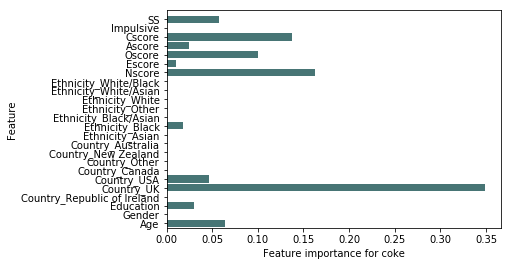

In [451]:
def plot_feature_importances_benzos(model):
    n_features = X_train3.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, color=(0.2,0.4,0.4,0.9), align='center')
    #plt.barh(make a horizontal bar plot)
    plt.yticks(np.arange(n_features), feature_col_names)
    #plt.yticks(get the current trick location&label of the Y axis)
    plt.xlabel("Feature importance for coke")
    plt.ylabel("Feature")
    plt.ylim(-0.5, n_features)

plot_feature_importances_coke(tree3)

# grid searched tree

In [429]:
#grid searched tree
from sklearn.model_selection import GridSearchCV
opt_tree = DecisionTreeClassifier(random_state = 42)
param_DT = {"max_depth": range(1,15),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,5),
           "criterion":('entropy','gini')}

grid_tree = GridSearchCV(opt_tree,param_DT,cv=5)
grid_tree.fit(X_train1_New,y_train1)
print(grid_tree.best_params_)
print()
print("Accuracy on train set for alcohol: {:.3f}".format(grid_tree.score(X_train1_New,y_train1)))
print("Accuracy on test set for alcohol: {:.3f}".format(grid_tree.score(X_test1_New,y_test1)))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 15), 'min_samples_split': range(2, 10), 'max_leaf_nodes': range(2, 5), 'criterion': ('entropy', 'gini')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'criterion': 'entropy', 'max_depth': 1, 'max_leaf_nodes': 4, 'min_samples_split': 2}

Accuracy on train set for alcohol: 0.986
Accuracy on test set for alcohol: 0.979


# We can perform each model on these 3 variables but for conciseness we focus on variable alcohol for all the following models

# Random Forest (use the same parameters from grid decision tree)

In [452]:
# random forest(use the same parameters from grid decision tree)
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_depth=1, max_leaf_nodes=4, min_samples_split=2, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train1_New, y_train1)
y_pred1 = rnd_clf.predict(X_test1_New)
print(accuracy_score(y_test1, y_pred1))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=4,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

0.980565371024735


# Neural Network

In [453]:
# Neural Network
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing.text import Tokenizer

classifier = Sequential()
# Adding the input layer and the first hidden layer
# rectified linear unit
classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=24))
classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

# Adding the second hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
classifier.add(Dropout(p=0.1))

# Adding the output layer
classifier.add(Dense(output_dim=7, init='uniform', activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

classifier.fit(X_train1_New, y_train1, validation_split = 0.20, batch_size=100, epochs=70,verbose=1)

/Users/meihao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=24, units=16, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/Users/meihao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/Users/meihao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  del sys.path[0]
/Users/meihao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  app.launch_new_instance()
/Users/meihao/anaconda3/lib/python3.7/site-pack

Train on 1055 samples, validate on 264 samples
Epoch 1/70
1055/1055 [==============================] - 0s 403us/step - loss: 0.6906 - accuracy: 0.9676 - val_loss: 0.6868 - val_accuracy: 0.9946
Epoch 2/70
1055/1055 [==============================] - 0s 30us/step - loss: 0.6830 - accuracy: 0.9951 - val_loss: 0.6771 - val_accuracy: 0.9946
Epoch 3/70
1055/1055 [==============================] - 0s 43us/step - loss: 0.6701 - accuracy: 0.9951 - val_loss: 0.6584 - val_accuracy: 0.9946
Epoch 4/70
1055/1055 [==============================] - 0s 35us/step - loss: 0.6426 - accuracy: 0.9951 - val_loss: 0.6159 - val_accuracy: 0.9946
Epoch 5/70
1055/1055 [==============================] - 0s 40us/step - loss: 0.5807 - accuracy: 0.9951 - val_loss: 0.5239 - val_accuracy: 0.9946
Epoch 6/70
1055/1055 [==============================] - 0s 33us/step - loss: 0.4590 - accuracy: 0.9951 - val_loss: 0.3609 - val_accuracy: 0.9946
Epoch 7/70
1055/1055 [==============================] - 0s 42us/step - loss: 0.276

Epoch 57/70
1055/1055 [==============================] - 0s 38us/step - loss: 0.0221 - accuracy: 0.9951 - val_loss: 0.0287 - val_accuracy: 0.9946
Epoch 58/70
1055/1055 [==============================] - 0s 39us/step - loss: 0.0222 - accuracy: 0.9951 - val_loss: 0.0289 - val_accuracy: 0.9946
Epoch 59/70
1055/1055 [==============================] - 0s 36us/step - loss: 0.0221 - accuracy: 0.9951 - val_loss: 0.0289 - val_accuracy: 0.9946
Epoch 60/70
1055/1055 [==============================] - 0s 40us/step - loss: 0.0222 - accuracy: 0.9951 - val_loss: 0.0288 - val_accuracy: 0.9946
Epoch 61/70
1055/1055 [==============================] - 0s 34us/step - loss: 0.0214 - accuracy: 0.9951 - val_loss: 0.0290 - val_accuracy: 0.9946
Epoch 62/70
1055/1055 [==============================] - 0s 36us/step - loss: 0.0217 - accuracy: 0.9951 - val_loss: 0.0292 - val_accuracy: 0.9946
Epoch 63/70
1055/1055 [==============================] - 0s 36us/step - loss: 0.0225 - accuracy: 0.9951 - val_loss: 0.0292 -

In [402]:
classifier.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 16)                400       
_________________________________________________________________
dense_32 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_21 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_22 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 7)                 119       
Total params: 1,063
Trainable params: 1,063
Non-trainable params: 0
___________________________________________________

# Draw the error plot

/Users/meihao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


Error: 0.5040528083874799
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Er

Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
E

Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
Error: 0.13560056319722782
E

Text(0.5, 1.0, 'Epoch Vs Error Rate')

Text(0.5, 0, 'Epoch')

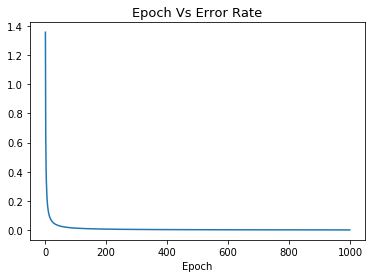

In [404]:
num_inputs = len(X_train_New[0])
hidden_layer_neurons = 13
np.random.seed(4)
b1 = 2*np.random.random(num_inputs) -1
w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) - 1


num_outputs = 7
b2 = 2*np.random.random(num_inputs) -1
w2 = 2*np.random.random((hidden_layer_neurons, num_outputs)) - 1


error = []
b1=0
b2=0
learning_rate = 0.2 # slowly update the network
for epoch in range(1000):
    l1 = 1/(1 + np.exp(-(np.dot(X_train1_New, w1) + b1))) # sigmoid function
    l2 = 1/(1 + np.exp(-(np.dot(l1, w2) +b2 )))
    er = (abs(y_train1 - l2)).mean()
    l2_delta = (y_train - l2)*(l2 * (1-l2))
    l1_delta = l2_delta.dot(w2.T) * (l1 * (1-l1))
    w2 += l1.T.dot(l2_delta) * learning_rate
    w1 += X_train_New.T.dot(l1_delta) * learning_rate
    error.append(er/(epoch*0.1))
    print('Error:', er)
    

sp = pd.Series(error)
sp.plot()
plt.title("Epoch Vs Error Rate",fontsize=13)
plt.xlabel("Epoch")

# Draw the Neural Network plot

(0.0, 1.0, 0.0, 1.0)

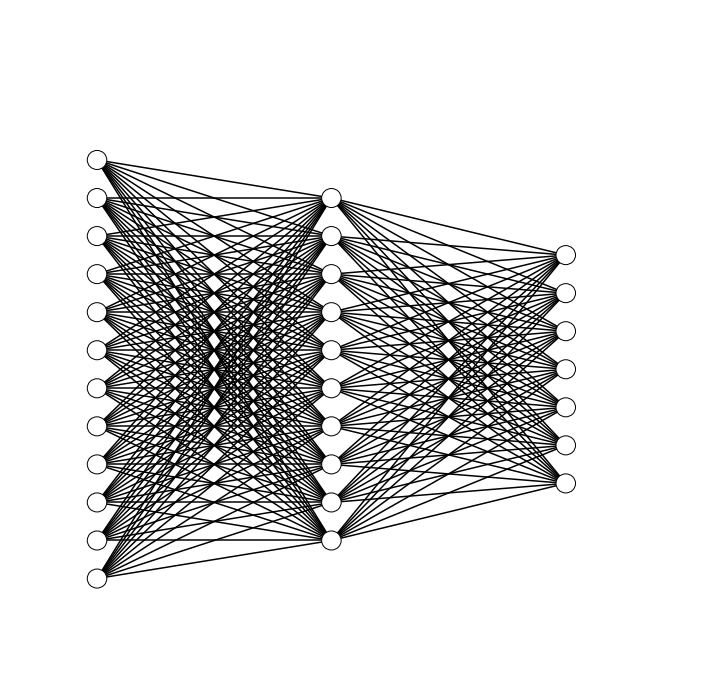

In [405]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)
                
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .8, .1, .8, [12, 10, 7])

# KNN

In [454]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
para_knn = {'n_neighbors': range(1,100)}
gs_cv_knn = GridSearchCV(KNeighborsClassifier(), para_knn, cv=5, return_train_score=True) 
gs_cv_knn.fit(X_train1_New, y_train1)
print("Best parameters: {}".format(gs_cv_knn.best_params_))
print("Best cross-validation score: {:.3f}".format(gs_cv_knn.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 100)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

Best parameters: {'n_neighbors': 3}
Best cross-validation score: 0.983


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform')

Text(0.5, 0, 'k')

Text(0, 0.5, 'Accuracy')

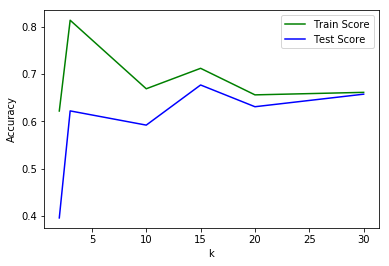

In [411]:
%matplotlib inline
train_score_array = []
test_score_array = []
krange = [2, 3, 10, 15, 20,30]
for k in krange:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train1_New, y_train1)
    train_score_array.append(knn.score(X_train1_New, y_train1))
    test_score_array.append(knn.score(X_test1_New, y_test1))
    
x_axis = [2, 3, 10, 15, 20,30]
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()   

# Linear/Logistic Reg/SVC ( unavailable in my case, because I transformed my target variable into a 7 dimensions dummy variable which made it not binary anymore )

#### feature importance plot

|Model name| Hyper-parameters|Model Score|
|---|---|---|
|KNeighborsClassifier| k = 3 | 0.983 |
|Neural Network | loss: 0.0218 | 0.9946 |
|Grid Search Decision Tree| criterion:entropy   max_depth:1   max_leaf_nodes:4  min_samples_split:2| 0.979 |
|Random Forest|max_depth=1  max_features=auto   max_leaf_nodes=4   min_samples_leaf=1 min_samples_split=2   n_estimators=500   n_jobs=-1| 0.98056 |


### Based on the information above, Neural Network is the best model